### load data

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sebasti

In [2]:
sns.set_style("whitegrid")

In [3]:
base_dir = "experiments/ablations"
figure_dir = os.path.join(base_dir, "figures")
os.makedirs(figure_dir, exist_ok=True)

In [4]:
files = sorted(glob.glob(os.path.join(base_dir, "csv/*")))
files

['experiments/ablations/csv/dql-False_tps-False_dpu-False.csv',
 'experiments/ablations/csv/dql-False_tps-False_dpu-True.csv',
 'experiments/ablations/csv/dql-False_tps-True_dpu-False.csv',
 'experiments/ablations/csv/dql-False_tps-True_dpu-True.csv',
 'experiments/ablations/csv/dql-True_tps-False_dpu-False.csv',
 'experiments/ablations/csv/dql-True_tps-False_dpu-True.csv',
 'experiments/ablations/csv/dql-True_tps-True_dpu-False.csv',
 'experiments/ablations/csv/dql-True_tps-True_dpu-True.csv']

In [5]:
dfs = []
for f in files:
    df = pd.read_csv(f)
    name = f.split("/")[-1].split(".")[0]
    df["ablations"] = name
    dfs.append(df)
df = pd.concat(dfs)

In [6]:
df.head()

,metric,value,step,ablations
0,td3_train_ep_return,-89.799957,408.0,dql-False_tps-False_dpu-False
1,td3_train_ep_return,-25.096226,579.0,dql-False_tps-False_dpu-False
2,td3_train_ep_return,-102.628036,699.0,dql-False_tps-False_dpu-False
3,td3_train_ep_return,-121.799591,943.0,dql-False_tps-False_dpu-False
4,td3_train_ep_return,-86.495102,1336.0,dql-False_tps-False_dpu-False


In [7]:
def plot_metrics(df, metrics, title, save=None):
    if isinstance(metrics, list):
        df = df[df.metric.isin(metrics)]
        g = sns.FacetGrid(df, col="metric", hue="ablations")
        g.map(sns.lineplot, "step", "value")
        fig = g.fig
    else:
        df = df[df.metric == metrics]
        g = sns.lineplot(data=df, x="step", y="value", hue="ablations")
        fig = g.get_figure()
    fig.suptitle(title, fontsize=14)
    if save is not None:
        fig.savefig(save)

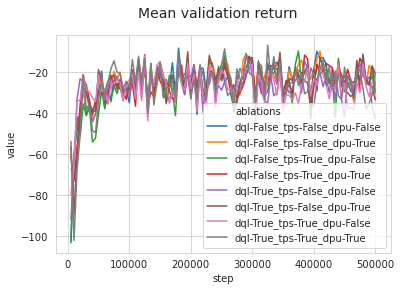

In [8]:
plot_metrics(df, "td3_val_return_mean", "Mean validation return", save=os.path.join(base_dir, "figures", "val_return_mean.png"))

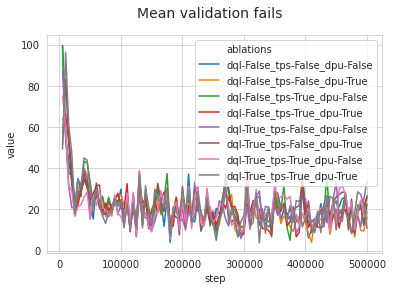

In [9]:
plot_metrics(df, "td3_val_fails_mean", "Mean validation fails", save=os.path.join(base_dir, "figures", "val_fails_mean.png"))

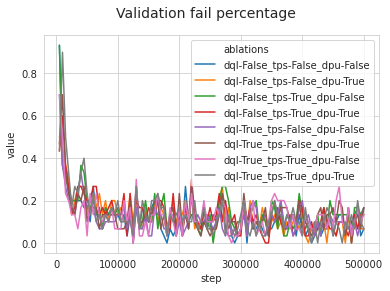

In [10]:
plot_metrics(df, "td3_val_fail_percentage", "Validation fail percentage", save=os.path.join(base_dir, "figures", "val_fail_percentage.png"))